<a href="https://colab.research.google.com/github/SATYA1962S/digit_1/blob/main/SpeedyLytics_Factors_Influencing_Sleep_Disorders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
orvile_health_and_sleep_relation_2024_path = kagglehub.dataset_download('orvile/health-and-sleep-relation-2024')

print('Data source import complete.')


Data source import complete.


In [4]:
!pip install duckdb duckdb-engine pandas plotly

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.9/583.9 kB 34.8 MB/s eta 0:00:00


![SpeedyLytics](https://static.wixstatic.com/media/f74e67_f46087b2f9594a0baa130ada7ce5dc1f~mv2.jpg/v1/fill/w_1024,h_567,al_c,q_85,enc_avif,quality_auto/f74e67_f46087b2f9594a0baa130ada7ce5dc1f~mv2.jpg)

Created with SpeedyLytics, a generative AI tool for data analysis. Try it [here](https://www.speedylytics.com).

# What factors influence sleep disorder?

## Impact of activities

_Explores the question "How does the probability for sleep disorders vary by occupation?" using query "
        SELECT
            "Occupation",
            COUNT(CASE WHEN "Sleep Disorder" != 'None' THEN 1 END) \* 100.0 / COUNT(\*) AS "Prevalence of Sleep Disorders"
        FROM
            CsvData
        GROUP BY
            "Occupation"
        ORDER BY
            "Prevalence of Sleep Disorders" DESC;
    "._

The query results reveal compelling trends in the prevalence of sleep disorders across various occupations. Sales representatives and salespersons exhibit alarmingly high rates of sleep disorders, with prevalence at 100% and 93.75%, respectively, suggesting that high-pressure, customer-facing roles may contribute significantly to sleep disturbances. Nurses, also in a demanding healthcare field, follow closely with a prevalence of 87.67%. In contrast, professions such as software engineering and accounting show significantly lower rates, at 25% and 18.92%, respectively, indicating that these roles might be less stressful or involve more predictable schedules. Interestingly, the prevalence drops dramatically among lawyers (10.64%), doctors (9.86%), and engineers (9.52%), with managers showing the lowest prevalence at 0%. This stark variation raises questions about the impact of occupational stressors, work hours, and job responsibilities on sleep health, highlighting the need for further examination of these influencing factors.

<Axes: title={'center': 'Prevalence of Sleep Disorders by Occupation'}, xlabel='Occupation', ylabel='Probability of Sleep Disorder (%)'>

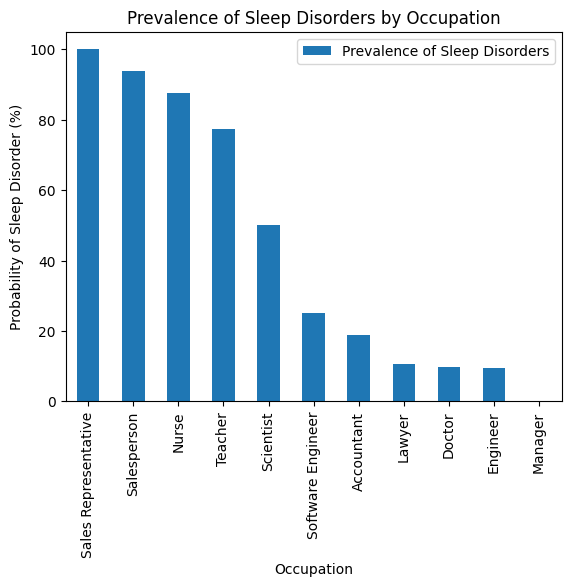

In [5]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        SELECT
            "Occupation",
            COUNT(CASE WHEN "Sleep Disorder" != 'None' THEN 1 END) * 100.0 / COUNT(*) AS "Prevalence of Sleep Disorders"
        FROM
            CsvData
        GROUP BY
            "Occupation"
        ORDER BY
            "Prevalence of Sleep Disorders" DESC;
     """).to_df()
result.plot(title="Prevalence of Sleep Disorders by Occupation", xlabel="Occupation", ylabel="Probability of Sleep Disorder (%)", x="Occupation", y=['Prevalence of Sleep Disorders'], kind="bar")

_Explores the question "How does the probability of sleep disorders differ between people doing an above-average and below-average number of daily steps?" using query "
        WITH StepCategories AS (
            SELECT
                CASE
                    WHEN "Daily Steps" > (SELECT AVG("Daily Steps") FROM CsvData) THEN 'Above Average'
                    ELSE 'Below Average'
                END AS step\_category,
                "Sleep Disorder"
            FROM CsvData
        )
        SELECT
            step\_category,
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) \* 1.0 / COUNT(\*) AS disorder\_probability
        FROM StepCategories
        GROUP BY step\_category;
    "._

The analysis of sleep disorder probability based on daily step categories presents noteworthy insights, suggesting a correlation between physical activity levels and sleep health. Individuals categorized as 'Below Average' in daily steps exhibit a notably higher disorder probability of 52.1%. In contrast, those in the 'Above Average' category display a significantly lower probability of 32.9%. This trend implies that increased physical activity, as indexed by daily steps, may play a protective role against the likelihood of experiencing sleep disorders. Such findings prompt deeper investigation into how lifestyle factors, such as exercise and physical movement, potentially influence sleep quality and overall health, reinforcing the importance of maintaining an active lifestyle for better sleep outcomes.

<Axes: title={'center': 'Probability of Sleep Disorders by Daily Steps'}, xlabel='Daily Steps Category', ylabel='Probability of Sleep Disorders'>

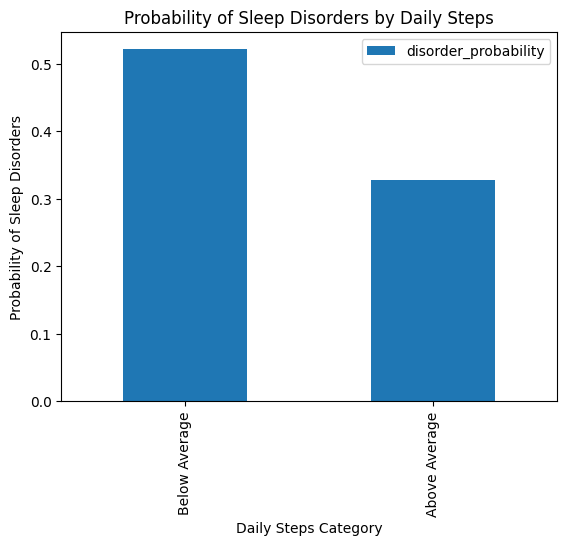

In [6]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        WITH StepCategories AS (
            SELECT
                CASE
                    WHEN "Daily Steps" > (SELECT AVG("Daily Steps") FROM CsvData) THEN 'Above Average'
                    ELSE 'Below Average'
                END AS step_category,
                "Sleep Disorder"
            FROM CsvData
        )
        SELECT
            step_category,
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) * 1.0 / COUNT(*) AS disorder_probability
        FROM StepCategories
        GROUP BY step_category;
     """).to_df()
result.plot(title="Probability of Sleep Disorders by Daily Steps", xlabel="Daily Steps Category", ylabel="Probability of Sleep Disorders", x="step_category", y=['disorder_probability'], kind="bar")

_Explores the question "How does the probability of sleep disorders vary between people with above-average and below-average physical activity?" using query "
        SELECT
            CASE
                WHEN "Physical Activity Level" > (SELECT AVG("Physical Activity Level") FROM CsvData) THEN 'Above Average'
                ELSE 'Below Average'
            END AS "Activity Level",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) \* 100.0 / COUNT(\*) AS "Disorder Rate"
        FROM CsvData
        GROUP BY "Activity Level"
    "._

Further analysis reveals a distinct disparity in disorder rates among different activity level categories. Individuals categorized as 'Below Average' in physical activity exhibit a disorder rate of approximately 49.7%, which is significantly higher than the 35.2% rate observed in those classified as 'Above Average'. This trend suggests a compelling link between lower physical activity levels and an increased prevalence of sleep disorders. With a nearly 14.5% difference in disorder rates, the data underscores the potential benefits of maintaining higher activity levels as a proactive measure for improving sleep health. These findings reinforce the hypothesis that engaging in regular physical activity may mitigate the likelihood of sleep disturbances.

<Axes: title={'center': 'Probability of Sleep Disorders by Physical Activity Level'}, xlabel='Physical Activity Level', ylabel='Probability of Sleep Disorders (%)'>

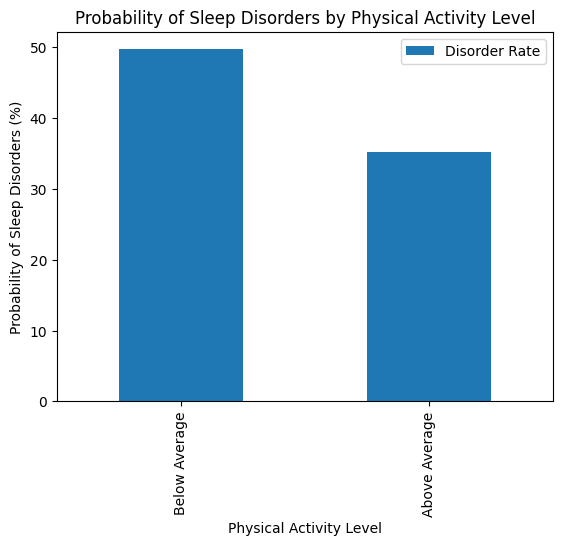

In [7]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        SELECT
            CASE
                WHEN "Physical Activity Level" > (SELECT AVG("Physical Activity Level") FROM CsvData) THEN 'Above Average'
                ELSE 'Below Average'
            END AS "Activity Level",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) * 100.0 / COUNT(*) AS "Disorder Rate"
        FROM CsvData
        GROUP BY "Activity Level"
     """).to_df()
result.plot(title="Probability of Sleep Disorders by Physical Activity Level", xlabel="Physical Activity Level", ylabel="Probability of Sleep Disorders (%)", x="Activity Level", y=['Disorder Rate'], kind="bar")

## Impact of overall health

_Explores the question "How does the probability of sleep disorders vary according to the BMI category?" using query "
        SELECT
            "BMI Category" AS "BMI Category",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) \* 1.0 / COUNT(\*) AS "Probability of Sleep Disorder"
        FROM CsvData
        GROUP BY "BMI Category"
        ORDER BY "BMI Category";
    "._

Recent analysis of the correlation between body mass index (BMI) categories and the probability of experiencing sleep disorders reveals significant trends. Individuals classified as "Normal" have a low probability of 6.15% for sleep disorders, which increases to 19.05% for those considered "Normal Weight." However, as BMI rises, the likelihood of sleep disorders escalates sharply, with "Overweight" individuals facing an 87.16% probability, and "Obese" individuals reaching a troubling 100% incidence rate. This data underscores the strong association between higher BMI categories and the prevalence of sleep disorders, highlighting the critical role that overall health plays in sleep quality.

<Axes: title={'center': 'Probability of Sleep Disorders by BMI Category'}, xlabel='BMI Category', ylabel='Probability of Sleep Disorder'>

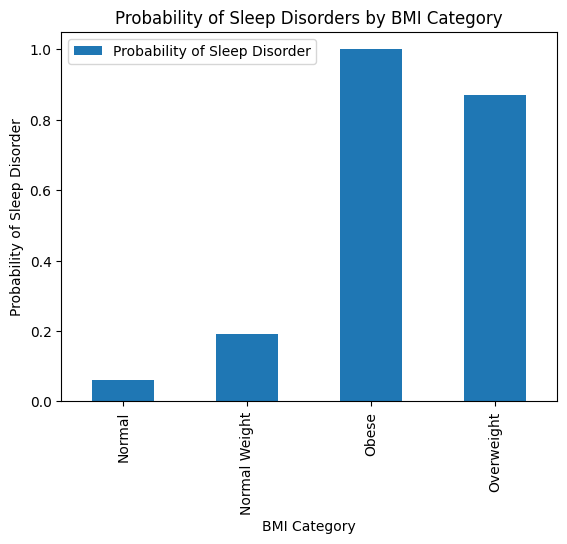

In [8]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        SELECT
            "BMI Category" AS "BMI Category",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) * 1.0 / COUNT(*) AS "Probability of Sleep Disorder"
        FROM CsvData
        GROUP BY "BMI Category"
        ORDER BY "BMI Category";
     """).to_df()
result.plot(title="Probability of Sleep Disorders by BMI Category", xlabel="BMI Category", ylabel="Probability of Sleep Disorder", x="BMI Category", y=['Probability of Sleep Disorder'], kind="bar")

_Explores the question "How does the probability of sleep disorders differ between people with above-average and below-average stress level?" using query "
        SELECT
            CASE
                WHEN "Stress Level" > (SELECT AVG("Stress Level") FROM CsvData) THEN 'Above Average'
                ELSE 'Below Average'
            END AS "Stress Level Category",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL AND "Sleep Disorder" <> 'None' THEN 1 END) \* 100.0 / COUNT(\*) AS "Probability of Having Sleep Disorder"
        FROM CsvData
        GROUP BY "Stress Level Category"
    "._

In addition to BMI, stress levels also play a crucial role in determining the likelihood of sleep disorders. The analysis indicates that individuals categorized as having an "Above Average" stress level exhibit a significantly higher probability of experiencing sleep disorders at 52.41%. In contrast, those in the "Below Average" stress level category demonstrate a markedly lower probability of 32.69%. This disparity highlights the detrimental impact that elevated stress levels can have on sleep quality, reinforcing the importance of effective stress management as a key component of overall health and well-being.

<Axes: title={'center': 'Impact of Stress Level on Sleep Disorders'}, xlabel='Stress Level Category', ylabel='Probability of Sleep Disorders'>

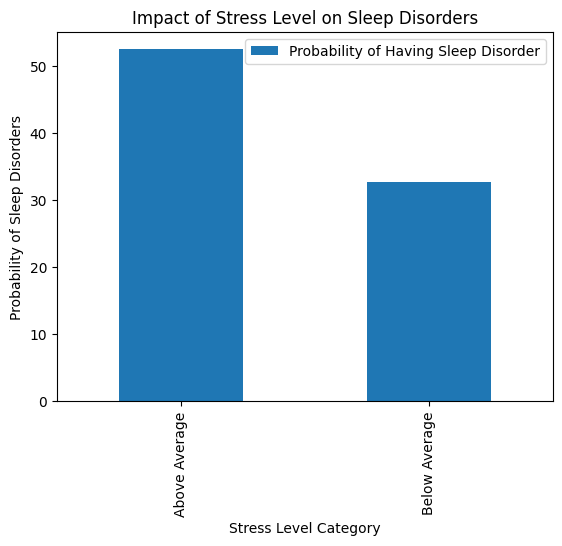

In [9]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        SELECT
            CASE
                WHEN "Stress Level" > (SELECT AVG("Stress Level") FROM CsvData) THEN 'Above Average'
                ELSE 'Below Average'
            END AS "Stress Level Category",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL AND "Sleep Disorder" <> 'None' THEN 1 END) * 100.0 / COUNT(*) AS "Probability of Having Sleep Disorder"
        FROM CsvData
        GROUP BY "Stress Level Category"
     """).to_df()
result.plot(title="Impact of Stress Level on Sleep Disorders", xlabel="Stress Level Category", ylabel="Probability of Sleep Disorders", x="Stress Level Category", y=['Probability of Having Sleep Disorder'], kind="bar")

_Explores the question "How does the probability of sleep disorders differ between people with above-average and below-average heart rate?" using query "
        SELECT
            CASE
                WHEN "Heart Rate" > (SELECT AVG("Heart Rate") FROM "CsvData") THEN 'Above Average Heart Rate'
                ELSE 'Below Average Heart Rate'
            END AS "Heart Rate Group",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) \* 1.0 / COUNT(\*) AS "Probability of Sleep Disorder"
        FROM "CsvData"
        GROUP BY "Heart Rate Group"
    "._

In examining the relationship between heart rate and sleep disorders, the findings reveal a striking trend: individuals with an "Above Average Heart Rate" have a substantially higher probability of experiencing sleep disorders at 68.42%, compared to a lower probability of 26.56% for those with a "Below Average Heart Rate." This notable difference suggests that heart rate could be a significant factor influencing sleep quality, as elevated heart rates may indicate heightened stress or anxiety levels, further undermining restorative sleep. Such insights emphasize the importance of monitoring heart rate as part of an integrative approach to health, particularly for those at risk for sleep-related issues.

<Axes: title={'center': 'Probability of Sleep Disorders by Heart Rate Group'}, xlabel='Heart Rate Group', ylabel='Probability of Sleep Disorder'>

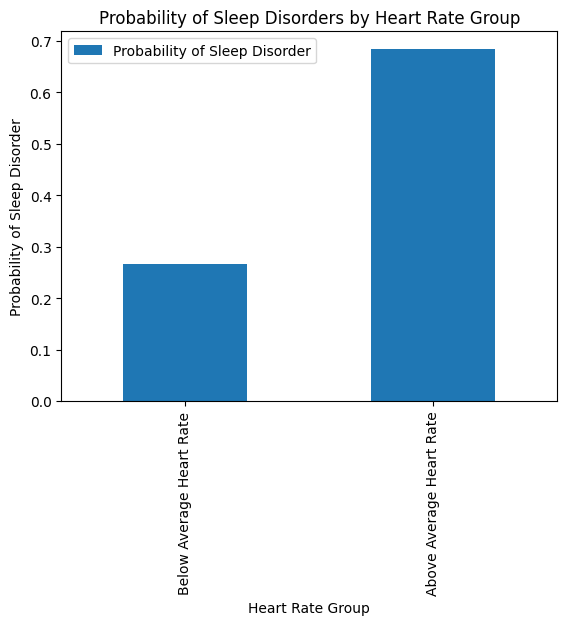

In [10]:
import duckdb
import pandas as pd

CsvData = pd.read_csv("/kaggle/input/health-and-sleep-relation-2024/Health and Sleep relation 2024/Sleep_health_and_lifestyle_dataset.csv")
result = duckdb.sql("""
        SELECT
            CASE
                WHEN "Heart Rate" > (SELECT AVG("Heart Rate") FROM "CsvData") THEN 'Above Average Heart Rate'
                ELSE 'Below Average Heart Rate'
            END AS "Heart Rate Group",
            COUNT(CASE WHEN "Sleep Disorder" IS NOT NULL THEN 1 END) * 1.0 / COUNT(*) AS "Probability of Sleep Disorder"
        FROM "CsvData"
        GROUP BY "Heart Rate Group"
     """).to_df()
result.plot(title="Probability of Sleep Disorders by Heart Rate Group", xlabel="Heart Rate Group", ylabel="Probability of Sleep Disorder", x="Heart Rate Group", y=['Probability of Sleep Disorder'], kind="bar")

In [3]:
%pip install duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 106.9 MB/s eta 0:00:00
